<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Part I

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Part II

### For the "Median value of owner-occupied homes" provide a boxplot

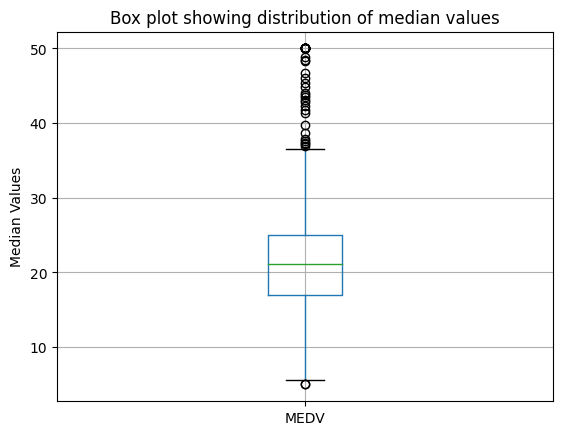

In [10]:
boston_df.boxplot(column = "MEDV")
plt.title("Box plot showing distribution of median values")
plt.ylabel("Median Values")
plt.xlabel("")
plt.show()

### Provide a  bar plot for the Charles river variable

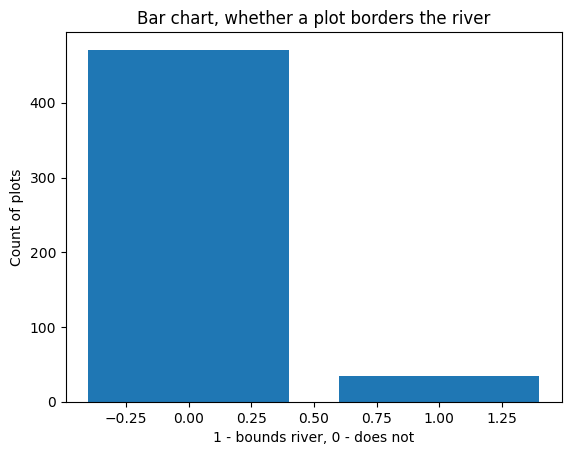

In [12]:
counts = boston_df['CHAS'].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Bar chart, whether a plot borders the river")
plt.ylabel("Count of plots")
plt.xlabel("1 - bounds river, 0 - does not")
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

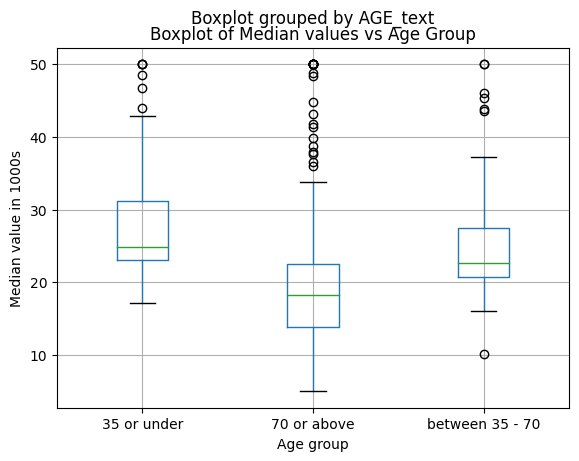

In [20]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_text"] = "35 or under"
boston_df.loc[((boston_df["AGE"] > 35) & (boston_df["AGE"] < 70)), "AGE_text"] = "between 35 - 70"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_text"] = "70 or above"

boston_df.boxplot(column = "MEDV", by = "AGE_text")
plt.title("Boxplot of Median values vs Age Group")
plt.ylabel("Median value in 1000s")
plt.xlabel("Age group")
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

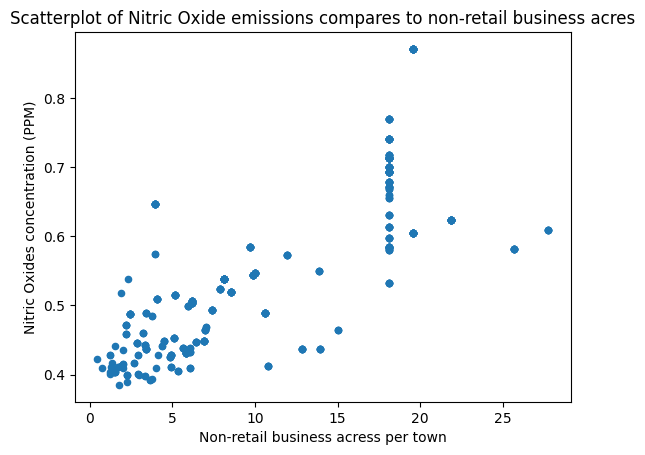

In [14]:
boston_df.plot.scatter(x = "INDUS", y = "NOX")
plt.title("Scatterplot of Nitric Oxide emissions compares to non-retail business acres")
plt.ylabel("Nitric Oxides concentration (PPM)")
plt.xlabel("Non-retail business acress per town")
plt.show()

The scatterplot above seems to indicate the fewer retail business acress correlates with a higher Nitric Oxide count in the air

### Create a histogram for the pupil to teacher ratio variable



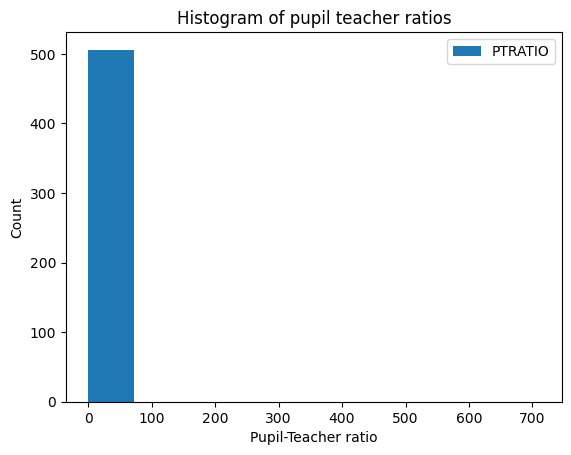

In [17]:
boston_df.plot.hist(column = "PTRATIO", bins = 10)
plt.title("Histogram of pupil teacher ratios")
plt.ylabel("Count")
plt.xlabel("Pupil-Teacher ratio")
plt.show()

## Part III

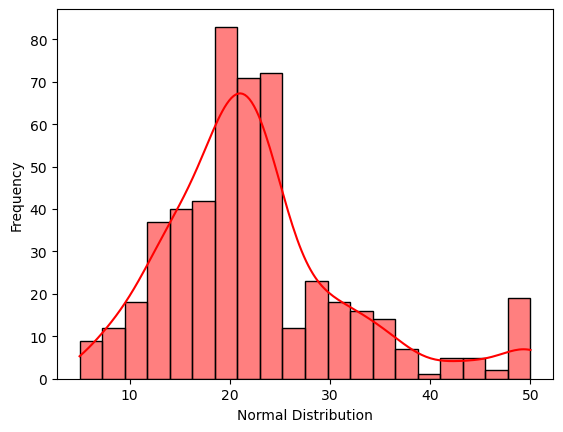

In [51]:
ax = sns.histplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

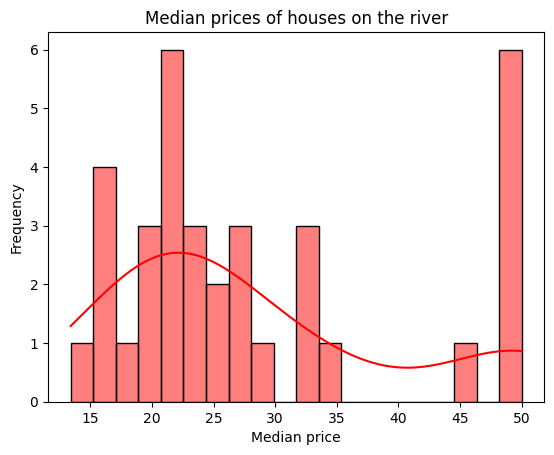

In [50]:
ax = sns.histplot(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  bins=20,
                  kde=True,
                  color='red')
ax.set(xlabel='Median price', ylabel='Frequency')
plt.title("Median prices of houses on the river")
plt.show()

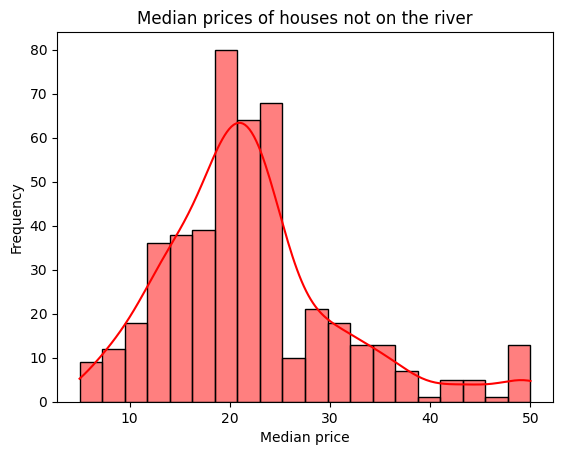

In [48]:
ax = sns.histplot(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                  bins=20,
                  kde=True,
                  color='red')
ax.set(xlabel='Median price', ylabel='Frequency')
plt.title("Median prices of houses not on the river")
plt.show()

In [46]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Hypothesis: There is a difference in the median house prices where the plot borders the river and where it doesn't
Null-Hypothesis: There is no difference in the median house prices where the plot borders the river and where it doesn't

α = 0.05
Conclusion:
As we see p-value < 0.05 (7.390623170519905e-05), we can reject the null-hypothesis and conclude that there is a statistically significant difference in median values of houses on the river and houses that are not

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Here we will split the data into three populations and run an ANOVA test

In [53]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_group"] = 0
boston_df.loc[((boston_df["AGE"] > 35) & (boston_df["AGE"] < 70)), "AGE_group"] = 1
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_group"] = 2

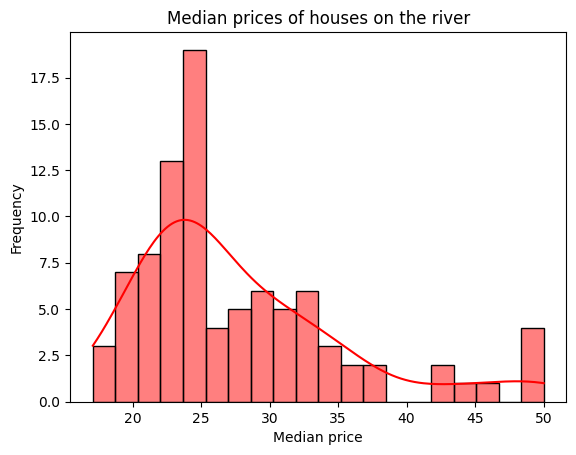

In [54]:
ax = sns.histplot(boston_df[boston_df['AGE_group'] == 0]['MEDV'],
                  bins=20,
                  kde=True,
                  color='red')
ax.set(xlabel='Median price', ylabel='Frequency')
plt.title("Median prices of houses on the river")
plt.show()

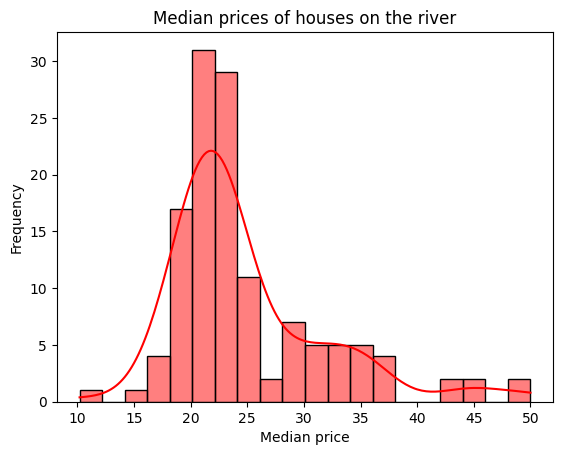

In [55]:
ax = sns.histplot(boston_df[boston_df['AGE_group'] == 1]['MEDV'],
                  bins=20,
                  kde=True,
                  color='red')
ax.set(xlabel='Median price', ylabel='Frequency')
plt.title("Median prices of houses on the river")
plt.show()

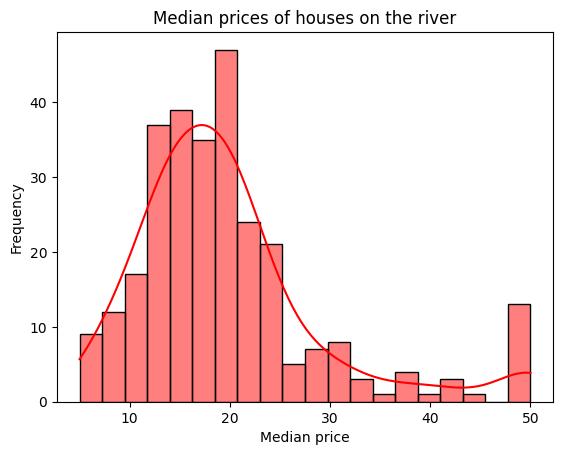

In [56]:
ax = sns.histplot(boston_df[boston_df['AGE_group'] == 2]['MEDV'],
                  bins=20,
                  kde=True,
                  color='red')
ax.set(xlabel='Median price', ylabel='Frequency')
plt.title("Median prices of houses on the river")
plt.show()

In [59]:
under_35 = boston_df[(boston_df["AGE"] <= 35)]["MEDV"]
from_35_to_70 = boston_df[((boston_df["AGE"] > 35) & (boston_df["AGE"] < 70))]["MEDV"]
above_70 = boston_df[(boston_df["AGE"] >= 70)]["MEDV"]

f_statistic, p_value = scipy.stats.f_oneway(under_35, from_35_to_70, above_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Hypothesis: There is a difference in the median house prices depending on the age group it falls into
Null-Hypothesis: There is no difference in the median house prices depending on the age group it falls into

α = 0.05
Conclusion:
As we see p-value < 0.05 (1.7105011022702984e-15), we can reject the null-hypothesis and conclude that there is a statistically significant difference in median values of houses based on their age group

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [60]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Hypothesis: There is a correlation between the proportion of non-retail industry acres per town and the PPM count of Nitric Oxide concentrations
Null-Hypothesis: There is no correlation between the proportion of non-retail industry acres per town and the PPM count of Nitric Oxide concentrations

α = 0.05
Conclusion:
As we see p-value < 0.05 (7.913361061210442e-98), we can reject the null-hypothesis and conclude that there is a statistically significant correlation between the proportion of non-retail industry acres per town and the PPM count of Nitric Oxide concentrations

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [70]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)

In [72]:
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = boston_df['DIS']
X= sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        12:26:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hypothesis: There is a correlation between the weighted distance to the five Boston Employment centres.
Null-Hypothesis: There is no correlation between the weighted distance to the five Boston Employment centres.

α = 0.05
Conclusion:
As we see p-value < 0.05 (1.21e-08), we can reject the null-hypothesis and conclude that there is a statistically significant correlation between between the weighted distance to the five Boston Employment centres.

#### We see that the impact one on additional weighted distance unit is approximately one additional median value increase in the house prices